BZAN 542

Charles Liu

In [1]:
library(tidyverse)
library(caret)
#set.seed(1) # if fixed randomization is desired

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.4
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




# Example: Flight Delays

In [2]:
## reading the data
data <- read.csv("FlightDelays.csv")
head(data)

,schedtime,carrier,deptime,dest,distance,date,flightnumber,origin,weather,dayweek,daymonth,tailnu,delay
,<int>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<int>,<int>,<chr>,<chr>
1,1455,OH,1455,JFK,184,1/1/2004,5935,BWI,0,4,1,N940CA,ontime
2,1640,DH,1640,JFK,213,1/1/2004,6155,DCA,0,4,1,N405FJ,ontime
3,1245,DH,1245,LGA,229,1/1/2004,7208,IAD,0,4,1,N695BR,ontime
4,1715,DH,1709,LGA,229,1/1/2004,7215,IAD,0,4,1,N662BR,ontime
5,1039,DH,1035,LGA,229,1/1/2004,7792,IAD,0,4,1,N698BR,ontime
6,840,DH,839,JFK,228,1/1/2004,7800,IAD,0,4,1,N687BR,ontime


In [3]:
x <- data[,c('schedtime','carrier','dest','origin','weather','dayweek')]
x$schedtime <- factor(floor(x$schedtime/100))
x$weather <- factor(x$weather)
x$dayweek <- factor(x$dayweek)
head(x)

,schedtime,carrier,dest,origin,weather,dayweek
,<fct>,<chr>,<chr>,<chr>,<fct>,<fct>
1,14,OH,JFK,BWI,0,4
2,16,DH,JFK,DCA,0,4
3,12,DH,LGA,IAD,0,4
4,17,DH,LGA,IAD,0,4
5,10,DH,LGA,IAD,0,4
6,8,DH,JFK,IAD,0,4


y
delayed  ontime 
    428    1773 

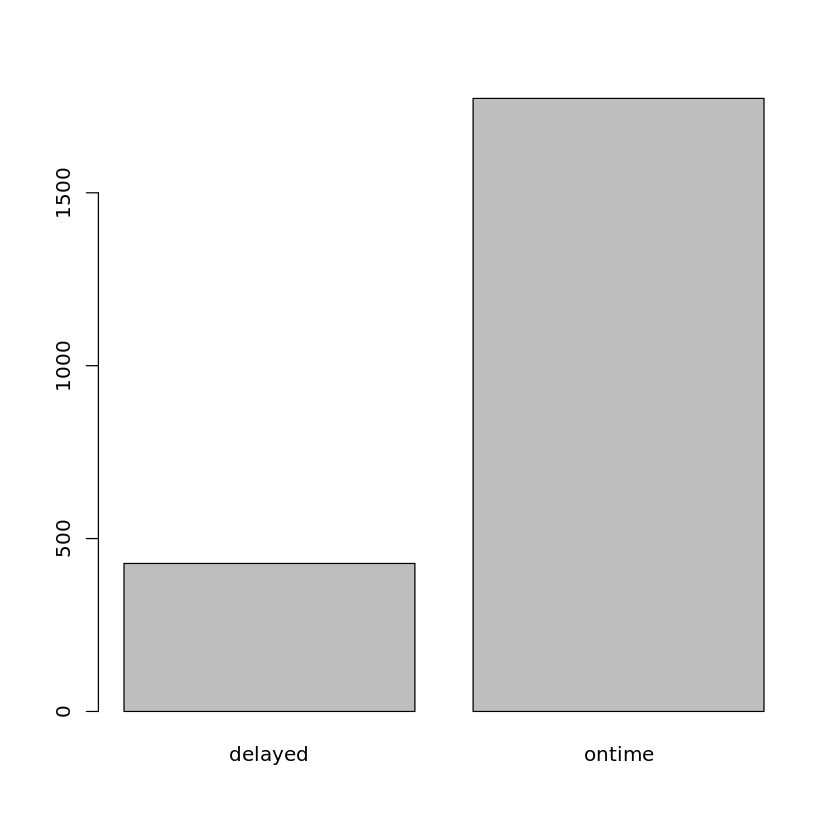

In [4]:
y <- data$delay
y.table <- table(y)
y.table
barplot(y.table)

__Warning!!!__

The `ontime` class is significantly larger than the `delayed` class. If we simply `classify` all flights as `ontime`, the accuracy would be 1773/2201 = 0.8055! Does it still make sense to continue? Anyway, let's try if some models can perform better.

In [5]:
# please use features (x) and classes (y) directly for nb (method)
train(x, y, method='nb', 
      tuneGrid = data.frame(usekernel = FALSE, fL = 0, adjust = 1),
      trControl = trainControl(method = "cv", number = 10)
)

Naive Bayes 

2201 samples
   6 predictor
   2 classes: 'delayed', 'ontime' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 1981, 1980, 1981, 1982, 1981, 1981, ... 
Resampling results:

  Accuracy   Kappa    
  0.8159989  0.1833186

Tuning parameter 'fL' was held constant at a value of 0
Tuning
 parameter 'usekernel' was held constant at a value of FALSE
Tuning
 parameter 'adjust' was held constant at a value of 1

In [6]:
# training and testing data sets
nTotal=nrow(x)
nTrain=floor(nTotal*(0.9))

train=sample(nTotal, nTrain)

x.train = x[train,]
y.train = y[train]
x.test = x[-train,]
y.test = y[-train]

In [7]:
fit <- train(x.train, y.train, method='nb', 
      tuneGrid = data.frame(usekernel = FALSE, fL = 0, adjust = 1),
      trControl = trainControl(method = "cv", number = 10)
)
fit

Naive Bayes 

1980 samples
   6 predictor
   2 classes: 'delayed', 'ontime' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 1781, 1782, 1782, 1782, 1783, 1782, ... 
Resampling results:

  Accuracy   Kappa    
  0.8111092  0.1628345

Tuning parameter 'fL' was held constant at a value of 0
Tuning
 parameter 'usekernel' was held constant at a value of FALSE
Tuning
 parameter 'adjust' was held constant at a value of 1

In [8]:
y.pred=predict(fit, newdata=x.test)
table(y.test, y.pred) # confusion matrix
sum(y.test==y.pred)/length(y.test) # prediction accuracy

         y.pred
y.test    delayed ontime
  delayed       3     33
  ontime        2    183

[1] 0.841629

In [9]:
fit$finalModel$apriori

grouping
  delayed    ontime 
0.1979798 0.8020202 

In [10]:
fit$finalModel$tables

$schedtime
         var
grouping           6          7          8          9         10         11
  delayed 0.04081633 0.05867347 0.06377551 0.02806122 0.02295918 0.01530612
  ontime  0.06045340 0.06675063 0.07619647 0.05604534 0.04974811 0.03337531
         var
grouping          12         13         14         15         16         17
  delayed 0.05102041 0.05102041 0.15306122 0.08673469 0.07397959 0.14795918
  ontime  0.06738035 0.07934509 0.09319899 0.06738035 0.07997481 0.10264484
         var
grouping          18         19         20         21
  delayed 0.03061224 0.08418367 0.01785714 0.07397959
  ontime  0.04219144 0.04596977 0.02204030 0.05730479

$carrier
         var
grouping          CO         DH         DL         MQ         OH         RU
  delayed 0.06122449 0.30612245 0.11224490 0.18622449 0.01020408 0.22448980
  ontime  0.04030227 0.23677582 0.18765743 0.11460957 0.01322418 0.17884131
         var
grouping          UA         US
  delayed 0.01275510 0.08673469
  on

# Example: Zoo

In [11]:
data(Zoo, package="mlbench")
head(Zoo)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<int>,<lgl>,<lgl>,<lgl>,<fct>
aardvark,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,4,FALSE,FALSE,TRUE,mammal
antelope,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE,FALSE,4,TRUE,FALSE,TRUE,mammal
bass,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,TRUE,0,TRUE,FALSE,FALSE,fish
bear,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,4,FALSE,FALSE,TRUE,mammal
boar,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,4,TRUE,FALSE,TRUE,mammal
buffalo,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE,FALSE,4,TRUE,FALSE,TRUE,mammal


In [12]:
summary(Zoo)

    hair          feathers          eggs            milk        
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:58        FALSE:81        FALSE:42        FALSE:60       
 TRUE :43        TRUE :20        TRUE :59        TRUE :41       
                                                                
                                                                
                                                                
                                                                
  airborne        aquatic         predator        toothed       
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:77        FALSE:65        FALSE:45        FALSE:40       
 TRUE :24        TRUE :36        TRUE :56        TRUE :61       
                                                                
                                                                
                                                                
                         

# Example: SVM

In [13]:
svmFit <- train(type ~., data = Zoo, method = "svmLinear",
    trControl = trainControl(method = "cv", number = 10)
)
svmFit

Support Vector Machines with Linear Kernel 

101 samples
 16 predictor
  7 classes: 'mammal', 'bird', 'reptile', 'fish', 'amphibian', 'insect', 'mollusc.et.al' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 92, 92, 91, 92, 90, 91, ... 
Resampling results:

  Accuracy   Kappa    
  0.9625758  0.9510103

Tuning parameter 'C' was held constant at a value of 1

## The final model

In [14]:
svmFinal <- svmFit$finalModel
svmFinal

Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 1 

Linear (vanilla) kernel function. 

Number of Support Vectors : 47 

Objective Function Value : -0.1448 -0.218 -0.1484 -0.1754 -0.0936 -0.1033 -0.297 -0.0819 -0.1556 -0.0907 -0.1135 -0.182 -0.5763 -0.13 -0.1833 -0.118 -0.0474 -0.0823 -0.1236 -0.1481 -0.5666 
Training error : 0 

## The support vectors

In [15]:
svmFinal@nSV

[1] 47

In [16]:
svmFinal@alphaindex

[[1]]
[1] 59 64 67 96

[[2]]
[1] 64 67 77 85 91 92 95

[[3]]
[1] 62 64 67 87 93

[[4]]
[1] 10 50 53 55 64 67 90 95

[[5]]
[1] 10 40 52 64 89 94

[[6]]
[1]   4  10  33  54  64  67  73 100

[[7]]
[1] 42 57 63 81 91

[[8]]
[1] 59 93

[[9]]
[1] 22 42 53 59 79 80 90

[[10]]
[1]  31  42  43  89 101

[[11]]
[1]  14  22  42  54  57  73  82 100 101

[[12]]
[1] 35 62 77 81 83 87 91

[[13]]
[1] 27 53 77 92

[[14]]
[1] 25 43 89 91 92

[[15]]
[1]  14  54  63  73  77  91  92 100

[[16]]
[1] 53 62 83 90

[[17]]
[1] 83 87 89 98

[[18]]
[1] 14 15 54 62 73 78 83 87

[[19]]
[1] 25 27 89 90 98

[[20]]
[1]  26  27  47  53  54  73  90 100

[[21]]
[1]  43  54  73  89  98 100

In [17]:
svmIndex <- unique(unlist(svmFinal@alphaindex))
svmIndex

[1]  59  64  67  96  77  85  91  92  95  62  87  93  10  50  53  55  90  40  52
[20]  89  94   4  33  54  73 100  42  57  63  81  22  79  80  31  43 101  14  82
[39]  35  83  27  25  98  15  78  26  47

In [18]:
Zoo[svmIndex, ]

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<int>,<lgl>,<lgl>,<lgl>,<fct>
penguin,FALSE,TRUE,TRUE,FALSE,FALSE,TRUE,TRUE,FALSE,TRUE,TRUE,FALSE,FALSE,2,TRUE,FALSE,TRUE,bird
platypus,TRUE,FALSE,TRUE,TRUE,FALSE,TRUE,TRUE,FALSE,TRUE,TRUE,FALSE,FALSE,4,TRUE,FALSE,TRUE,mammal
porpoise,FALSE,FALSE,FALSE,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,0,TRUE,FALSE,TRUE,mammal
vulture,FALSE,TRUE,TRUE,FALSE,TRUE,FALSE,TRUE,FALSE,TRUE,TRUE,FALSE,FALSE,2,TRUE,FALSE,TRUE,bird
seasnake,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,FALSE,0,TRUE,FALSE,FALSE,reptile
squirrel,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE,FALSE,2,TRUE,FALSE,FALSE,mammal
tortoise,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,4,TRUE,FALSE,TRUE,reptile
tuatara,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,4,TRUE,FALSE,FALSE,reptile
vole,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE,FALSE,4,TRUE,FALSE,FALSE,mammal


## The confusion matrix

Note that usually we want to apply the model on new testing data, not on the same training data!

In [19]:
# test with train data, which is not convincing, so can you try cross-validation?
pred <- predict(svmFit, newdata = Zoo)
table(Zoo$type, pred) # confusion matrix
sum(Zoo$type==pred)/nrow(Zoo) # prediction accuracy

               pred
                mammal bird reptile fish amphibian insect mollusc.et.al
  mammal            41    0       0    0         0      0             0
  bird               0   20       0    0         0      0             0
  reptile            0    0       5    0         0      0             0
  fish               0    0       0   13         0      0             0
  amphibian          0    0       0    0         4      0             0
  insect             0    0       0    0         0      8             0
  mollusc.et.al      0    0       0    0         0      0            10

[1] 1

# Example: Non-linear SVM

In [20]:
n <- 100
nld <- matrix(0, 2*n, 3, dimnames = list(NULL, c('x1', 'x2', 'y')))
head(nld)

x1,x2,y
0,0,0
0,0,0
0,0,0
0,0,0
0,0,0
0,0,0


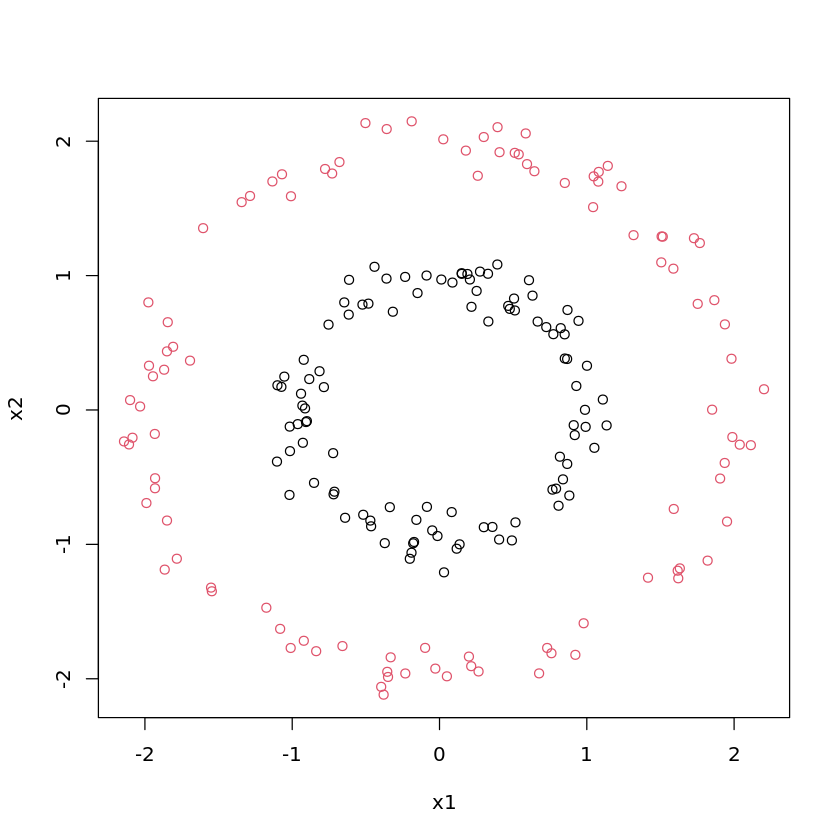

In [21]:
theta <- runif(n, 0, 2*pi)
one <- rnorm(n, 1, 0.1)
two <- rnorm(n, 2, 0.1)
nld[1:100, 1] <- one*cos(theta)
nld[1:100, 2] <- one*sin(theta)
nld[1:100, 3] <- 1
nld[101:200, 1] <- two*cos(theta)
nld[101:200, 2] <- two*sin(theta)
nld[101:200, 3] <- 2
plot(nld[,1:2], col=nld[,3])

In [22]:
nld <- as.data.frame(nld)
nld$y <- as.factor(nld$y)
head(nld)

,x1,x2,y
,<dbl>,<dbl>,<fct>
1,-0.6164225,0.7096639,1
2,-0.1492561,0.8700074,1
3,-0.7848982,0.1701877,1
4,0.6662631,0.6579354,1
5,-0.9217363,0.3733937,1
6,-0.6409158,-0.8020568,1


In [23]:
model = train(y~x1+x2, data=nld, method = "svmLinear")
table(nld$y, predict(model))

   
     1  2
  1 64 36
  2 57 43

In [24]:
model = train(y~x1+x2, data=nld, method = "svmRadial")
table(nld$y, predict(model))

   
      1   2
  1 100   0
  2   0 100

In [25]:
grid = expand.grid(x1=seq(-2,2,0.1), x2=seq(-2,2,0.1))
pred = predict(model, grid)

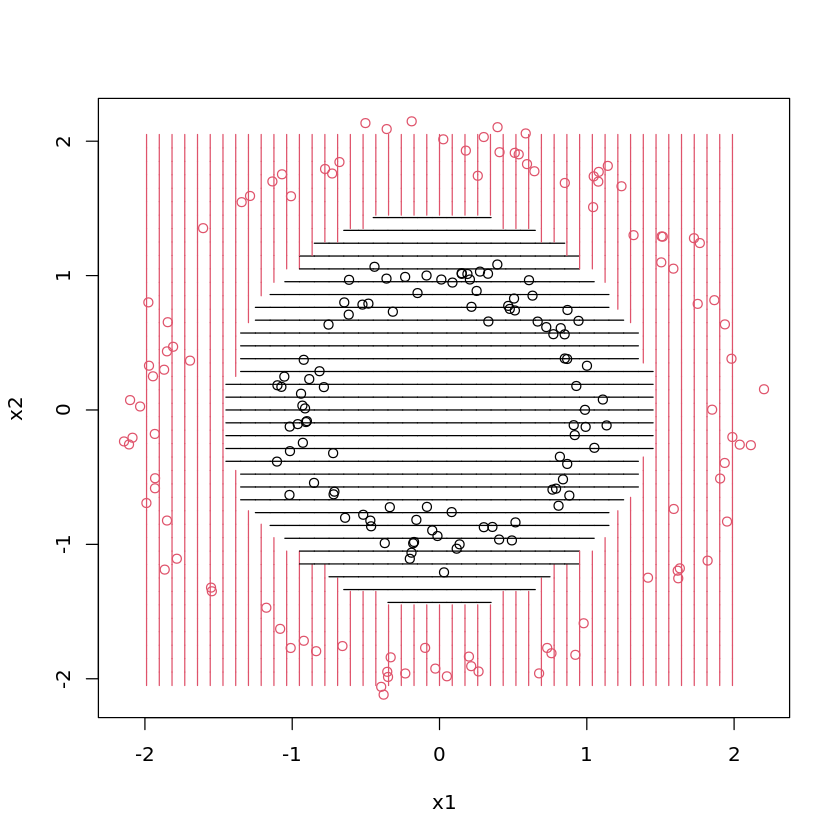

In [26]:
plot(nld[,1:2], col=nld[,3])
angles = c(0, 90)
for (n in 1:nrow(grid)) {
  x1=grid[n,1]
  x2=grid[n,2]  
  rect(x1-0.05, x2-0.05, x1+0.05, x2+0.05,
       col=pred[n], border = "transparent", density=10, angle=angles[pred[n]])
}

# Random Forest

In [27]:
1-(0.2)^2

[1] 0.96

In [28]:
set.seed(542)
rfFit <- train(type ~ ., data = Zoo, method = "rf",
    trControl = trainControl(method = "cv", number = 10),
    tuneGrid = expand.grid(
        mtry = 1:10
    )
)
rfFit

Random Forest 

101 samples
 16 predictor
  7 classes: 'mammal', 'bird', 'reptile', 'fish', 'amphibian', 'insect', 'mollusc.et.al' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 91, 90, 93, 91, 92, 90, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   1    0.9052525  0.8691250
   2    0.9616162  0.9487939
   3    0.9707071  0.9602522
   4    0.9616162  0.9487939
   5    0.9616162  0.9487939
   6    0.9727273  0.9645833
   7    0.9727273  0.9645833
   8    0.9727273  0.9638441
   9    0.9818182  0.9760417
  10    0.9818182  0.9760417

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 9.

# Gradient Boosted Decision Trees (xgboost)

In [29]:
xgbFit <- train(type ~ ., data = Zoo, method = "xgbTree",
    trControl = trainControl(method = "cv", number = 10),
    tuneGrid = expand.grid(
        nrounds = 20,
        max_depth = 3,
        colsample_bytree = .6,
        eta = 0.1,
        gamma=0,
        min_child_weight = 1,
        subsample = .5
    )
)
xgbFit

eXtreme Gradient Boosting 

101 samples
 16 predictor
  7 classes: 'mammal', 'bird', 'reptile', 'fish', 'amphibian', 'insect', 'mollusc.et.al' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 90, 91, 91, 89, 91, 91, ... 
Resampling results:

  Accuracy   Kappa    
  0.9425758  0.9246793

Tuning parameter 'nrounds' was held constant at a value of 20
Tuning
 held constant at a value of 1
Tuning parameter 'subsample' was held
 constant at a value of 0.5

# Artificial Neural Network

In [30]:
nnetFit <- train(type ~ ., data = Zoo, method = "nnet",
    trControl = trainControl(method = "cv", number = 10),
    tuneLength = 5,
    trace = FALSE)
nnetFit

Neural Network 

101 samples
 16 predictor
  7 classes: 'mammal', 'bird', 'reptile', 'fish', 'amphibian', 'insect', 'mollusc.et.al' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 91, 92, 91, 93, 91, 90, ... 
Resampling results across tuning parameters:

  size  decay  Accuracy   Kappa    
  1     0e+00  0.7738889  0.6855852
  1     1e-04  0.6789141  0.5492423
  1     1e-03  0.8361616  0.7722988
  1     1e-02  0.8279798  0.7720353
  1     1e-01  0.7391162  0.6470786
  3     0e+00  0.8272980  0.7606187
  3     1e-04  0.9025253  0.8688256
  3     1e-03  0.9316162  0.9077726
  3     1e-02  0.9697980  0.9575613
  3     1e-01  0.9425253  0.9226960
  5     0e+00  0.9300253  0.9053570
  5     1e-04  0.9191162  0.8904406
  5     1e-03  0.9507071  0.9329953
  5     1e-02  0.9507071  0.9329953
  5     1e-01  0.9507071  0.9329953
  7     0e+00  0.9291162  0.9028154
  7     1e-04  0.9382071  0.9136859
  7     1e-03  0.9507071  0.9329953
  7     1e-02  0.9507071 

# Package: randomForest

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin





Call:
 randomForest(x = iris[, -5], y = iris[, 5], proximity = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 4%
Confusion matrix:
           setosa versicolor virginica class.error
setosa         50          0         0        0.00
versicolor      0         47         3        0.06
virginica       0          3        47        0.06


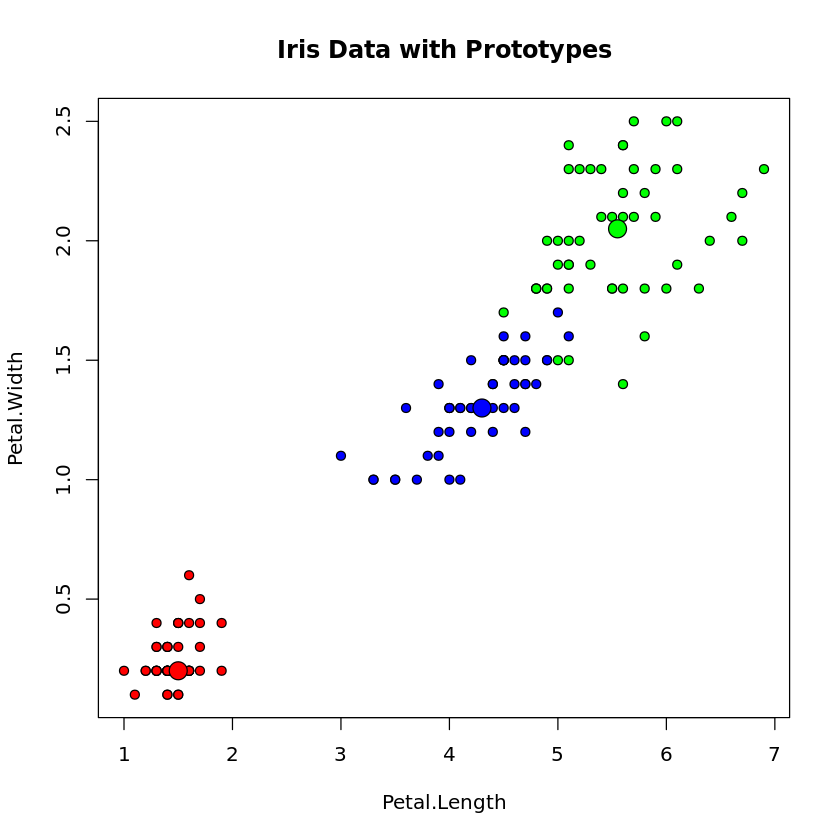

In [31]:
library(randomForest)
rf <- randomForest(iris[,-5], iris[,5], prox=TRUE)
rf.p <- classCenter(iris[,-5], iris[,5], rf$prox)
plot(iris[,3], iris[,4], pch=21, xlab=names(iris)[3], ylab=names(iris)[4],
     bg=c("red", "blue", "green")[as.numeric(factor(iris$Species))],
     main="Iris Data with Prototypes")
points(rf.p[,3], rf.p[,4], pch=21, cex=2, bg=c("red", "blue", "green"))
print(rf)